In [1]:
from skimage.transform import rescale, resize, downscale_local_mean
from utils import preprocess_bw
from sklearn import svm
import skimage
import cv2
import os
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt


In [28]:
def load_data(path):
    X = []
    y = []
    for label in os.listdir(path):
        if os.path.isdir(os.path.join(path,label)):
            for filename in os.listdir(os.path.join(path,label)):
                if not filename.startswith("."):
                    img = cv2.imread(os.path.join(path,label,filename), 0)
                    preprocessed = preprocess_bw(img)
                    output = skimage.transform.resize(preprocessed, (20,20), mode="reflect")
                    X.append(output)
                    y.append(int(label))
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [29]:
X, y = load_data("training2")

In [30]:
n_samples = len(X)
X_input = X.reshape((n_samples, -1))

In [31]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X_input, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape

(5760, 400)

In [33]:
from sklearn import datasets, svm, metrics


In [34]:
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
test_result = svc_model.predict(X_test)

0 6


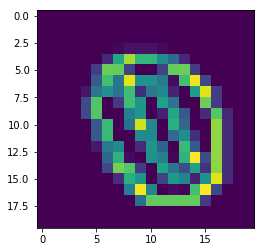

In [46]:
idx = 55
print(y_test[idx], test_result[idx])
plt.imshow(np.reshape(X_test[idx], (-1, 20)))

In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test, test_result))

             precision    recall  f1-score   support

          0       0.24      0.31      0.28       153
          1       0.61      0.64      0.63       146
          2       0.32      0.34      0.33       139
          3       0.23      0.25      0.24       143
          4       0.38      0.38      0.38       137
          5       0.27      0.27      0.27       146
          6       0.20      0.18      0.19       145
          7       0.57      0.49      0.53       146
          8       0.23      0.18      0.20       153
          9       0.22      0.22      0.22       132

avg / total       0.33      0.33      0.33      1440



In [20]:
digits = datasets.load_digits()

In [21]:
digits.data.shape

(1797, 64)

In [23]:
n_samples = len(X)
X_input = digits.images.reshape((n_samples, -1))

ValueError: cannot reshape array of size 115008 into shape (144000,newaxis)

In [24]:
n_samples

144000

In [27]:
X.shape

(144000, 20, 20)